In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

###Import the data.

In [12]:
pod_num = 'F5_field'

In [44]:
df_P = pd.read_csv(filepath_or_buffer = 'data/F5_field.csv', parse_dates = [[1,2]], index_col = False)  
df_P = df_P.set_index('YYYY/MM/DD_HH:MM:SS')
df_P.drop(df_P.columns[[0,2,3,4,5,6,8,9,10,11,12,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40]], axis=1, inplace=True)
print df_P[:5]

                       UnixTime  e2v03  Temp    Rh  Unnamed: 43
YYYY/MM/DD_HH:MM:SS                                            
2014-07-22 00:00:03  1405987203     30  37.7  16.0            0
2014-07-22 00:00:10  1405987210     30  37.8  15.9            0
2014-07-22 00:00:19  1405987219     30  37.8  16.1            0
2014-07-22 00:00:27  1405987227     30  37.9  15.8            0
2014-07-22 00:00:35  1405987235     30  37.8  15.3            0


In [ ]:
df_P.drop(df_P.columns[[4]], axis=1, inplace=True)

#df_P = pd.io.parsers.read_csv(filepath_or_buffer = 'D3_new_features.csv', parse_dates = [0], index_col = 0)
print df_P[:5]

#If you have already written a new file after cleaning a row, import it before cleaning the next row.

In [3]:
df_P = pd.io.parsers.read_csv(filepath_or_buffer = 'clean_CAMP.csv',index_col = 0)

#Start here if this is the first run through the file.

####Enter the column number you'd like to evaluate.

In [63]:
#col = raw_input('Enter the column you would like to inspect: ')
col = 'e2v03'

####Define a function, called unique_column_values, that displays every unique value in the selected column.

In [64]:
def unique_column_values(df,column_name):

    #df.keys generates a list containing all of the column names
    column_names = df.keys()
    #look at every unique value in each column sto make sure they look reasonable
    #column_num is the number of the column that the user picks
    print column_name, df[column_name].unique()


####Call the unique_column_values function for column of the data that you want to evaluate. Look at the data and make sure there aren't any obvious outliers.


In [65]:
unique_column_values(df_P,col)

e2v03 [30 29 28 27 31 32 33 34 35 38 39 40 37 36 41 42 43 44 45 46 48 49 51 52 50
 47 26 25 53 54 55 56 57 58 59 24 60 61 62 63 64 65 66 67 68 69 70 71 72 23
 22 21 20 19 18 95 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91
 92 93 94 17 16 15 96]


In [66]:
def assign_pod_calibration_times(pod_num, time_chunk):
    if time_chunk == 1:
        if pod_num == 'F3' or pod_num == 'F4' or pod_num == 'F5' or pod_num == 'F6'  or pod_num == 'F7' or pod_num == 'D0':
            xlim = ['2014-07-11 00:00:00', '2014-07-13 00:00:00']
        elif pod_num == 'D8' or pod_num == 'F8':
            xlim = ['2014-07-11 00:00:00', '2014-7-12 00:00:00']
        elif pod_num == 'D4' or pod_num == 'D6' or pod_num == 'D8' or pod_num == 'N4' or pod_num == 'N7' or pod_num == 'N8':
            xlim = ['2014-07-13 00:00:00', '2014-7-15 00:00:00']
        elif pod_num == 'N3' or pod_num == 'N5' or pod_num == 'D3':
            xlim = ['2014-07-8 00:00:00', '2014-7-11 00:00:00']
        elif pod_num == 'F5_field':
            xlim = ['2014-07-21 19:17:18', '2014-8-5 0:00:00' ]
    else: 
        if pod_num == 'F8':
            xlim = ['2014-08-29 00:00:00', '2014-09-4 00:00:00']
        elif pod_num == 'D4' or pod_num == 'F4':
            xlim = ['2014-08-15 00:00:00', '2014-08-21 00:00:00']
        elif pod_num == 'D0':
            xlim = ['2014-08-30 00:00:00', '2014-09-4 00:00:00']

        elif (pod_num == 'D3' or pod_num == 'D6' or pod_num == 'F3' or pod_num == 'D8' or pod_num == 'F5' or 
            pod_num == 'F6' or pod_num == 'N8'):
            xlim = ['2014-08-21 00:00:00', '2014-08-30 00:00:00']
        elif pod_num == 'F7' or pod_num == 'N4':
            xlim = ['2014-08-15 00:00:00', '2014-08-21 00:00:00']
        elif pod_num == 'N3':
            xlim = ['2014-08-14 00:00:00', '2014-08-21 00:00:00']
        elif pod_num == 'D4' or pod_num == 'N5':
            xlim = ['2014-08-29 00:00:00', '2014-09-4 00:00:00']
        elif pod_num == 'N7':
            xlim = ['2014-08-16 00:00:00', '2014-08-22 00:00:00']
        elif pod_num == 'F5_field':
            xlim = ['2014-8-5 00:00:00', '2014-8-21 0:00:00']
    return xlim

####Define a function, column_plot, that gives you a plot of all of the data on one column. Look for outliers.

In [67]:
def column_plot(df,column_name, time_chunk):

    #df.keys generates a list containing all of the column names
    column_names = df.keys()
    print column_names
    #xlim = ['2014-07-23 0:00:00', '2014-7-25 0:00:00' ]
    xlim = assign_pod_calibration_times(pod_num, time_chunk)
    #look at every unique value in each column sto make sure they look reasonable
    #column_num is the number of the column that the user picks
    df[column_name].plot(marker = '.',figsize = (20,10), legend = True, xlim = xlim)

####Call the function, column_plot, using the column of the data that you want to plot.

Index([u'UnixTime', u'e2v03', u'Temp', u'Rh', u'Unnamed: 43'], dtype='object')


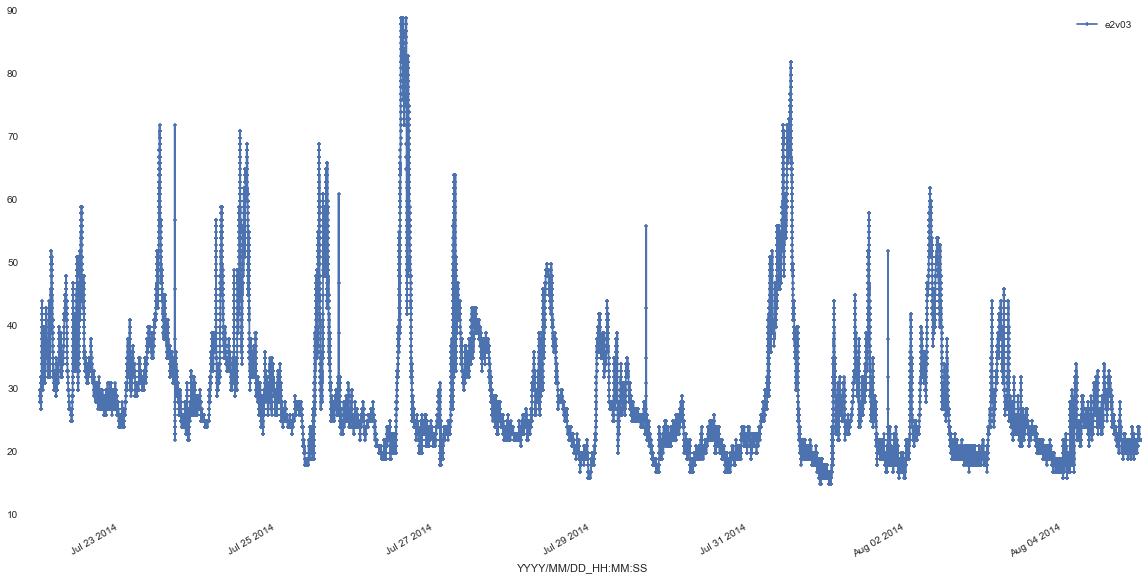

In [71]:
column_plot(df_P,col, 1)

Index([u'UnixTime', u'e2v03', u'Temp', u'Rh', u'Unnamed: 43'], dtype='object')


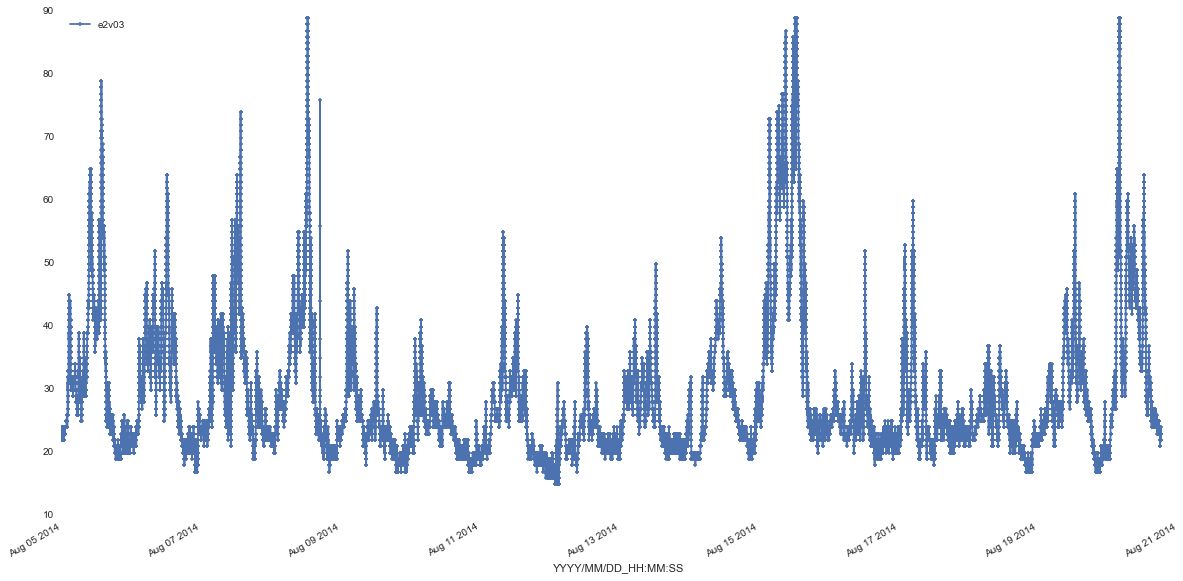

In [73]:
column_plot(df_P,col, 2)

#You can stop here and move on the the next column if you don't see any outliers!!!!

####Define a function, remove_data_above, that removes data above a specified value.

In [17]:
def remove_data_above(df,column_name,n):

    #df.keys generates a list containing all of the column names
    column_names = df.keys()
    #remove values below/above n from the matrix
    df = df[df[column_name] < n]
    #print unique values to make sure the bad ones got removed
    print column_name, df[column_name].unique()
    #return the dataframe, so that it can be used to change df_K
    return df

####Define a function, remove_data_below, that removes data below a specified value.

In [18]:
def remove_data_below(df,column_name,n):

    #df.keys generates a list containing all of the column names
    column_names = df.keys()
    #remove values below/above n from the matrix
    df = df[df[column_name] > n]
    #print unique values to make sure the bad ones got removed
    print column_name, df[column_name].unique()
    #return the dataframe, so that it can be used to change df_K
    return df

####Call the function, remove_data_above, to remove data above a certain value, by entering (df_K,col,value).

In [70]:
df_P = remove_data_above(df_P,col,90)

e2v03 [30 29 28 27 31 32 33 34 35 38 39 40 37 36 41 42 43 44 45 46 48 49 51 52 50
 47 26 25 53 54 55 56 57 58 59 24 60 61 62 63 64 65 66 67 68 69 70 71 72 23
 22 21 20 19 18 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 17 16 15]


####Call the function, remove_data_below, to remove data below a certain value, by entering (df_K,col,value).

In [59]:
df_P = remove_data_below(df_P,col,0)

Temp [ 40.2  40.1  40.3  40.4  40.5  40.6  40.8  40.9  41.   41.2  41.1  41.3
  41.4  41.5  41.6  41.7  41.8  41.9  42.   42.1  40.7  40.   39.9  39.8
  39.7  39.6  39.5  39.4  39.3  39.2  39.1  39.   38.9  38.8  38.7  38.6
  38.5  38.4  38.3  38.2  38.1  38.   37.9  37.8  37.7  37.6  37.5  37.4
  37.3  37.2  37.1  37.   36.9  36.8  36.7  36.6  36.5  36.4  36.3  36.2
  36.1  36.   35.9  35.8  35.7  35.6  35.5  35.4  35.3  35.2  35.1  35.
  34.9  34.8  34.7  34.6  34.5  34.4  34.3  34.2  34.1  34.   33.9  33.8
  33.7  33.6  33.5  33.4  33.3  33.2  33.1  33.   32.9  32.8  32.7  32.6
  32.5  32.4  32.3  32.2  32.1  32.   31.9  31.8  31.7  31.6  31.5  31.4
  31.3  31.2  31.1  31.   30.9  30.8  30.7  30.6  30.5  30.4  30.3  30.2
  30.1  30.   29.9  29.8  29.7  29.6  29.5  29.4  29.3  29.2  29.1  29.
  28.9  28.8  28.7  28.6  28.5  28.4  28.3  28.2  28.1  28.   27.9  27.8
  27.7  27.6  27.5  27.4  27.3  27.2  27.1  27.   26.9  26.8  26.7  26.6
  26.5  26.4  26.3  26.2  26.1  26.   25.9  25.8

####Replot the data to see how well the cleaning worked.

Index([u'UnixTime', u'e2v03', u'Temp', u'Rh'], dtype='object')


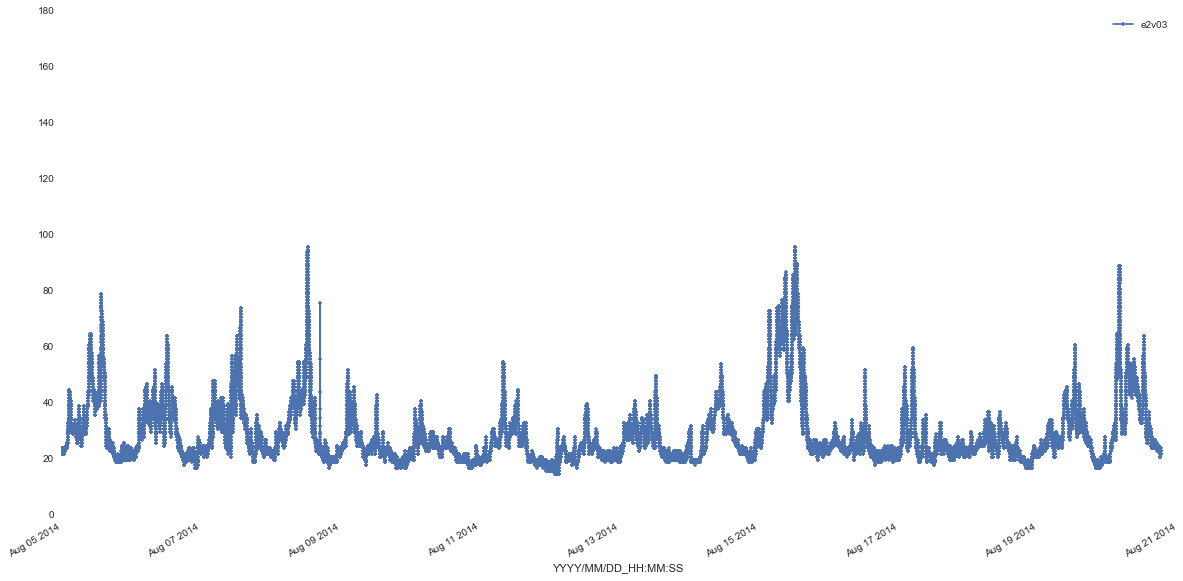

In [20]:
column_plot(df_P,col, 2)

#Go back and clean the data again if necessary.

###Otherwise, write the new dataframe to a file. Do this after cleaning each row, so that if you make a mistake with a row, you don't have to reclean all of the other rows.

In [74]:
df_P.to_csv(path_or_buf = 'F5_field_clean.csv')